# **KLASIFIKASI KANKER PAYUDARA MENGGUNAKAN SVM**

## **Deklarasi library dan Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('/content/KankerPayudara.csv')

In [3]:
df.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,NaN,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.28390,NaN,0.10520,0.2597,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.13280,0.1980,0.10430,0.1809,0.05883


## **Explorasi Data**

### Cek Data Tiap Atribut

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                569 non-null    int64  
 1   Diagnosis         569 non-null    object 
 2   Radius            566 non-null    float64
 3   Texture           566 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        565 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         565 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  564 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


### Cek Missing Value

In [5]:
df.isna().sum()

ID                  0
Diagnosis           0
Radius              3
Texture             3
Perimeter           0
Area                0
Smoothness          4
Compactness         0
Concavity           4
ConcavePoints       0
Symmetry            0
FractalDimension    5
dtype: int64

### Hapus Baris Yang Mengandung Data NaN

In [6]:
df = df.dropna()

### Ubah tiap nilai Atribut Diagnosis ke bilangan bulat

Ubah nilai 'B' menjadi nilai 0 sedangkan nilai 'M' menjadi nilai 1

In [7]:
df.drop('ID', axis=1, inplace=True)
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

<ipython-input-7-579cc81830bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID', axis=1, inplace=True)
<ipython-input-7-579cc81830bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})


### Grafik Tiap Atribut

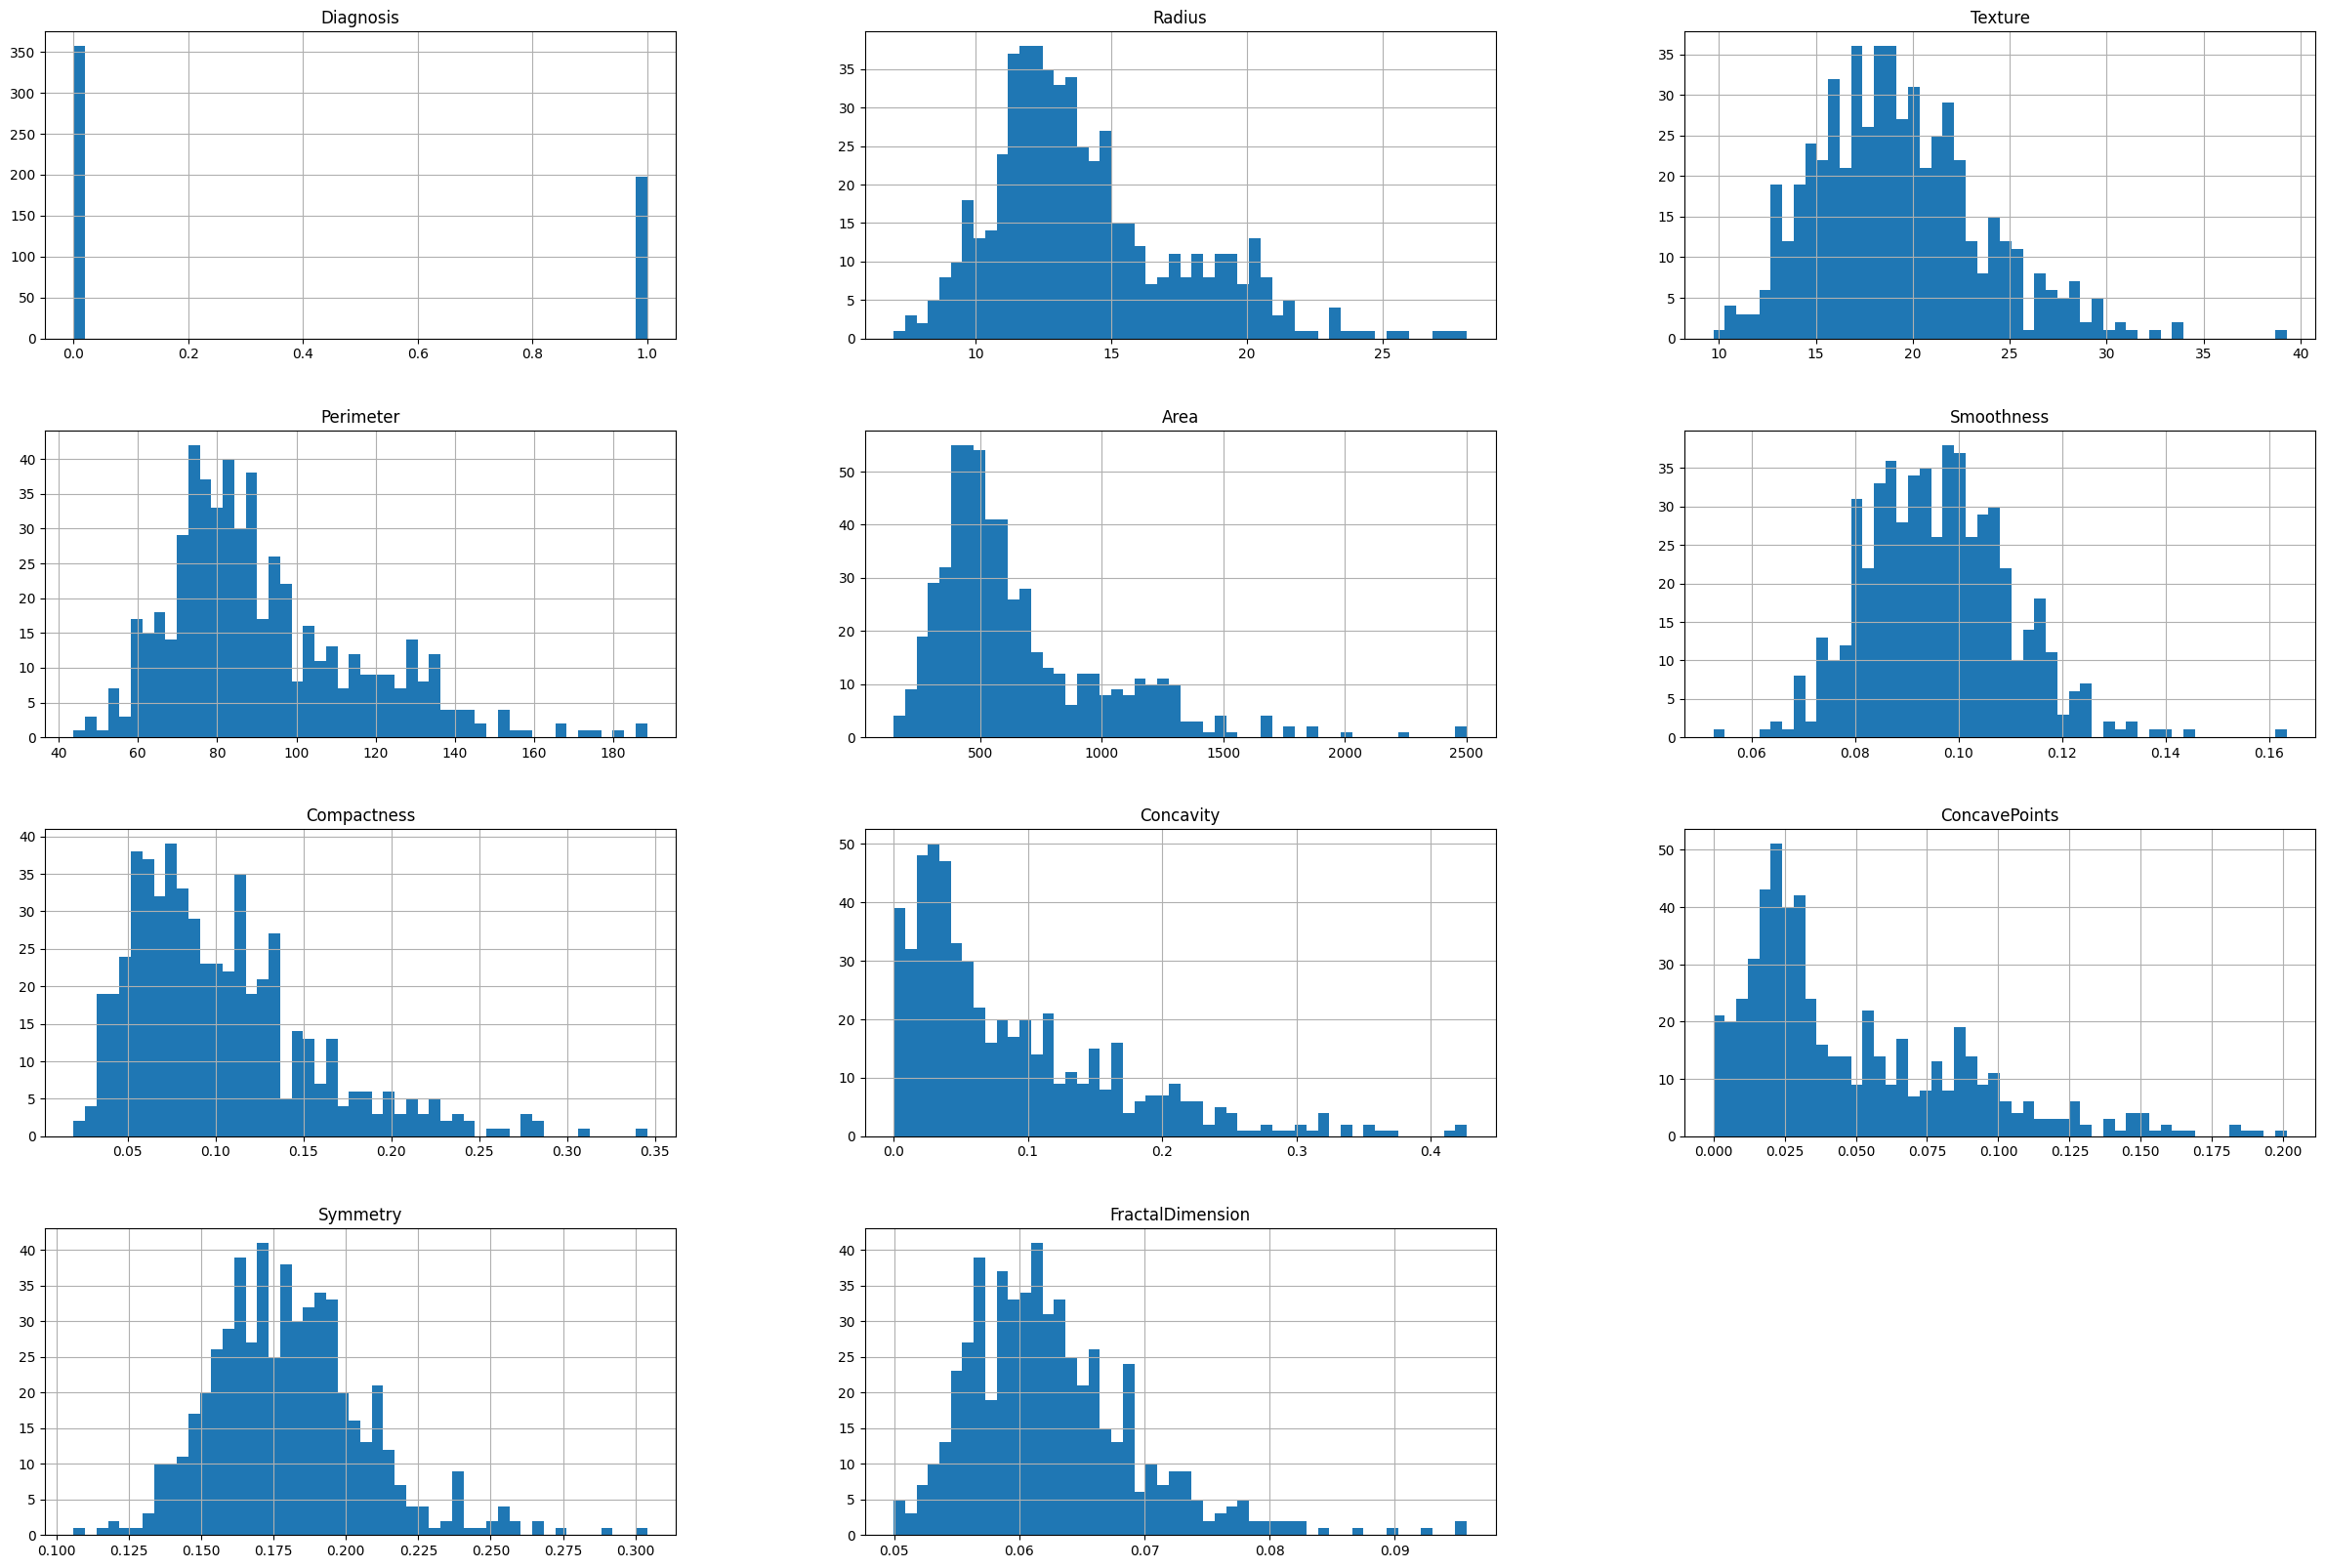

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(30,20))
plt.show()

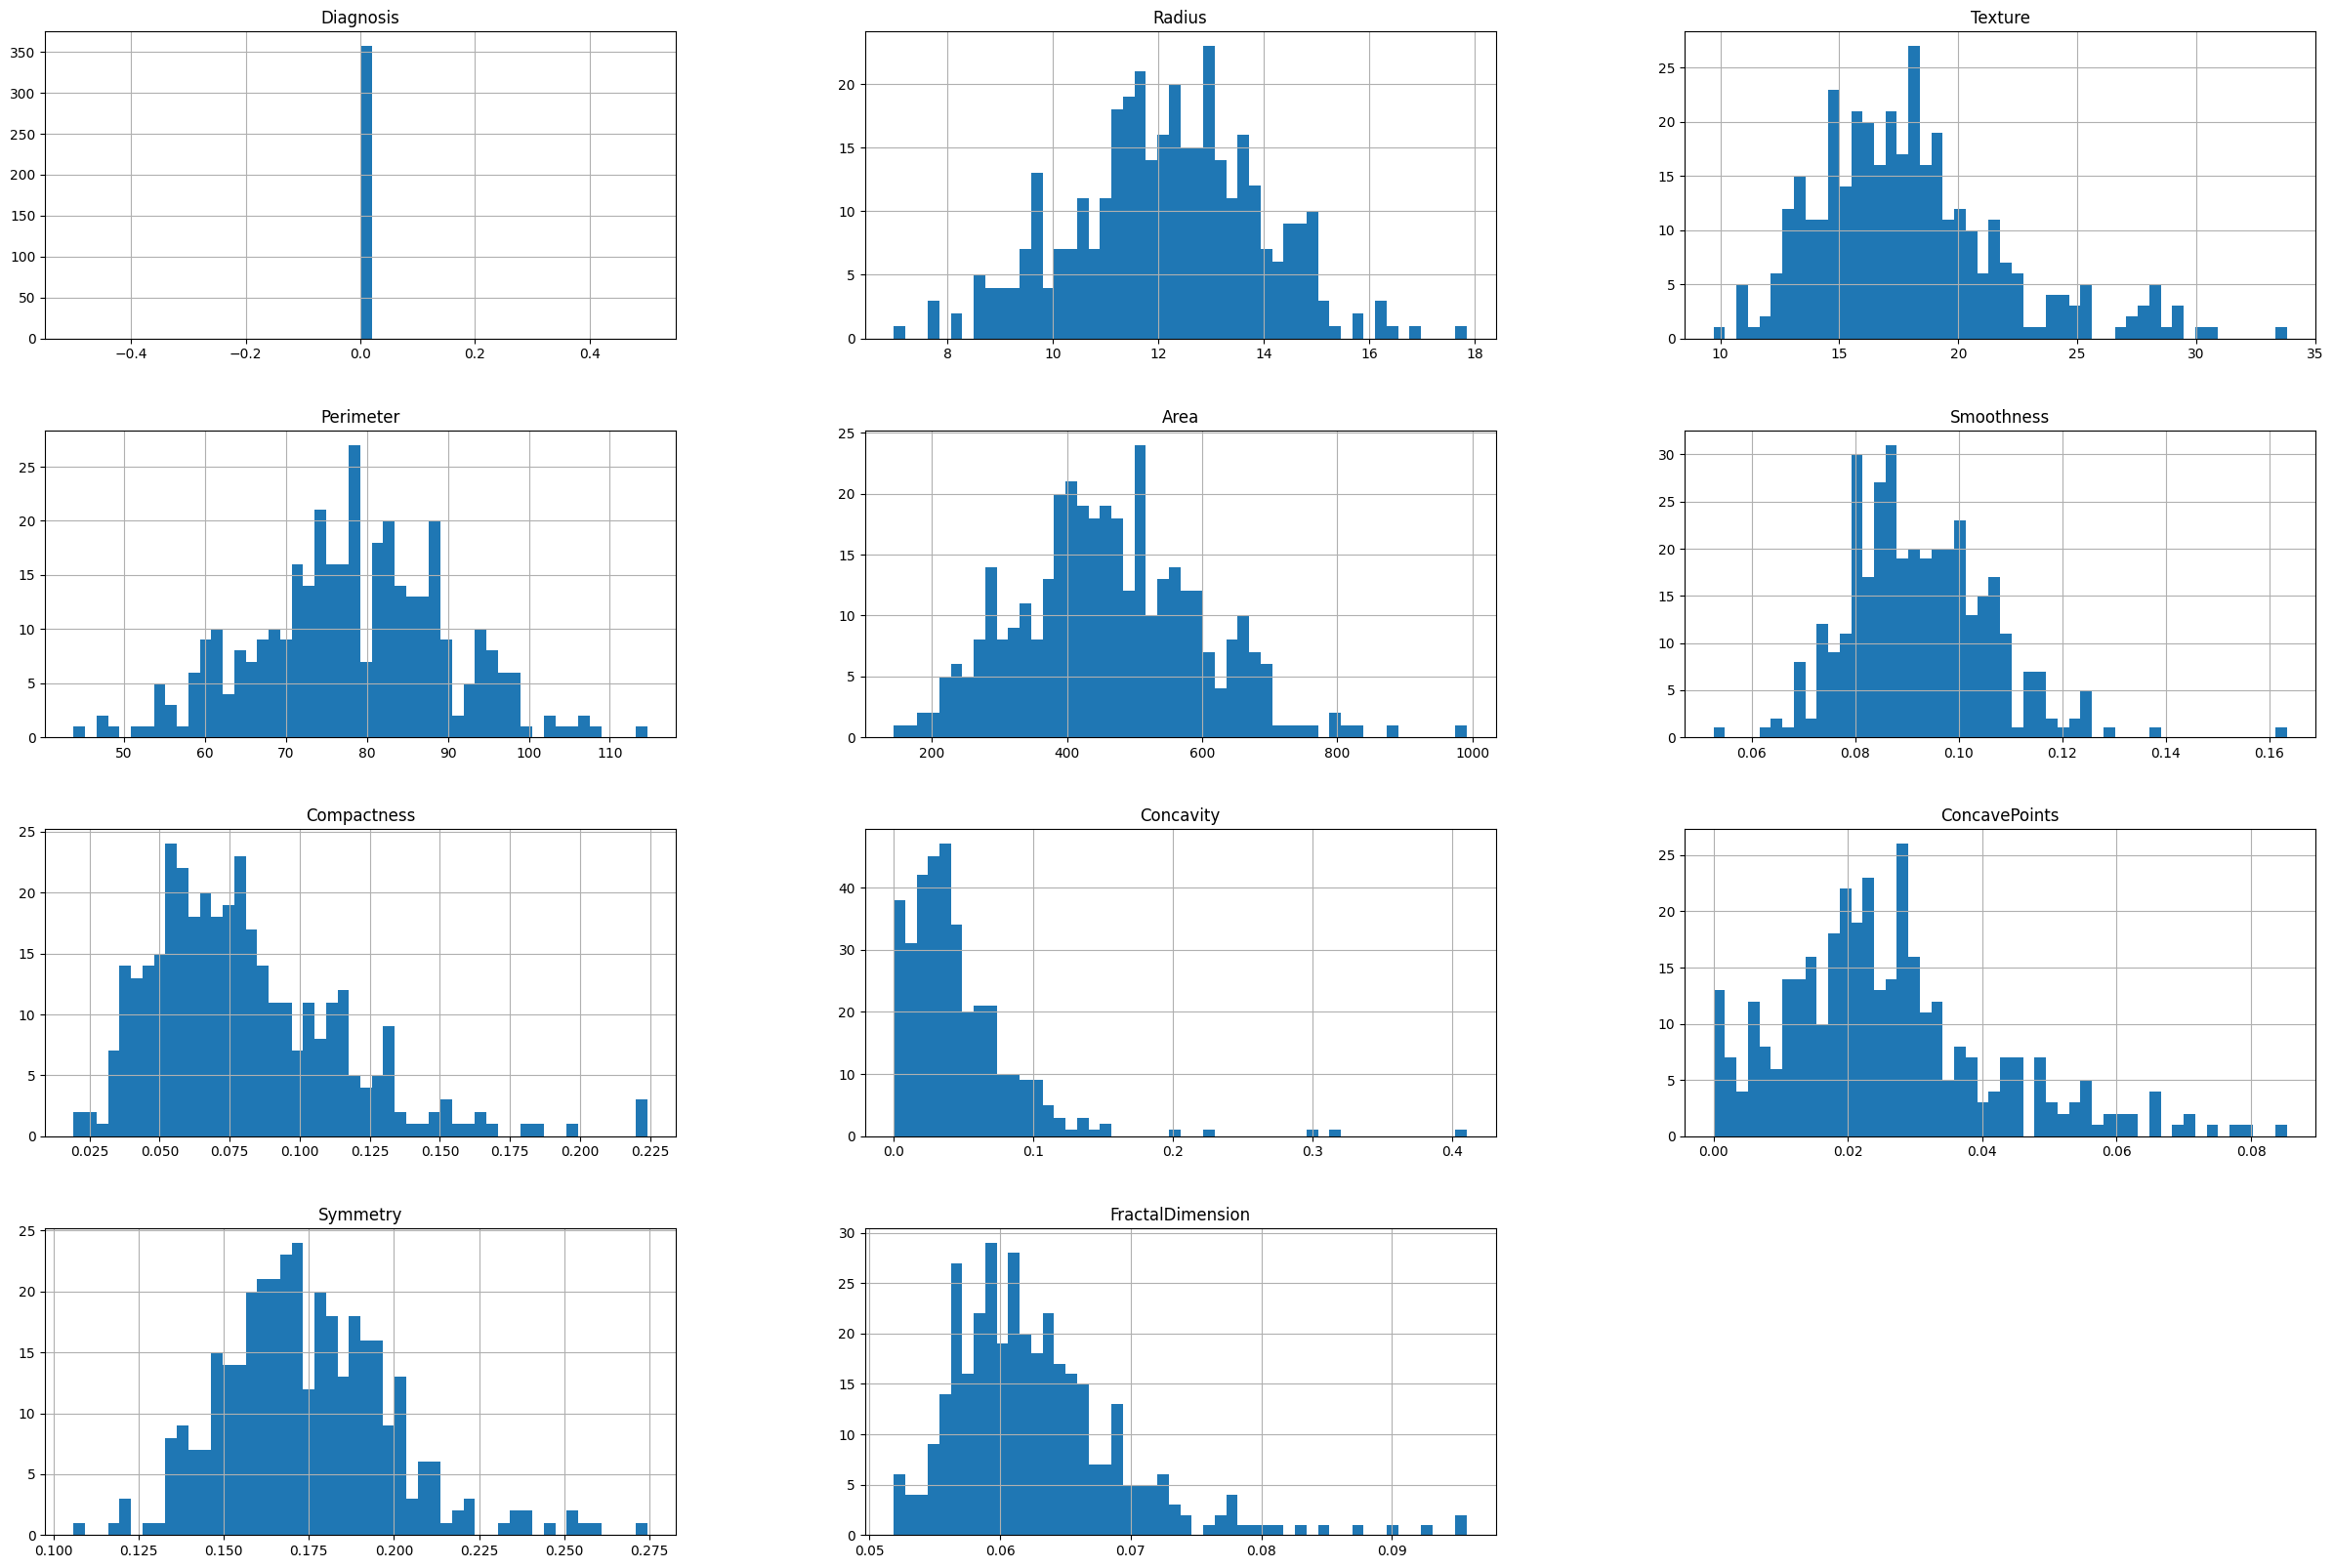

In [9]:
import matplotlib.pyplot as plt
df[df['Diagnosis']==0].hist(bins=50,figsize=(30,20))
plt.show()

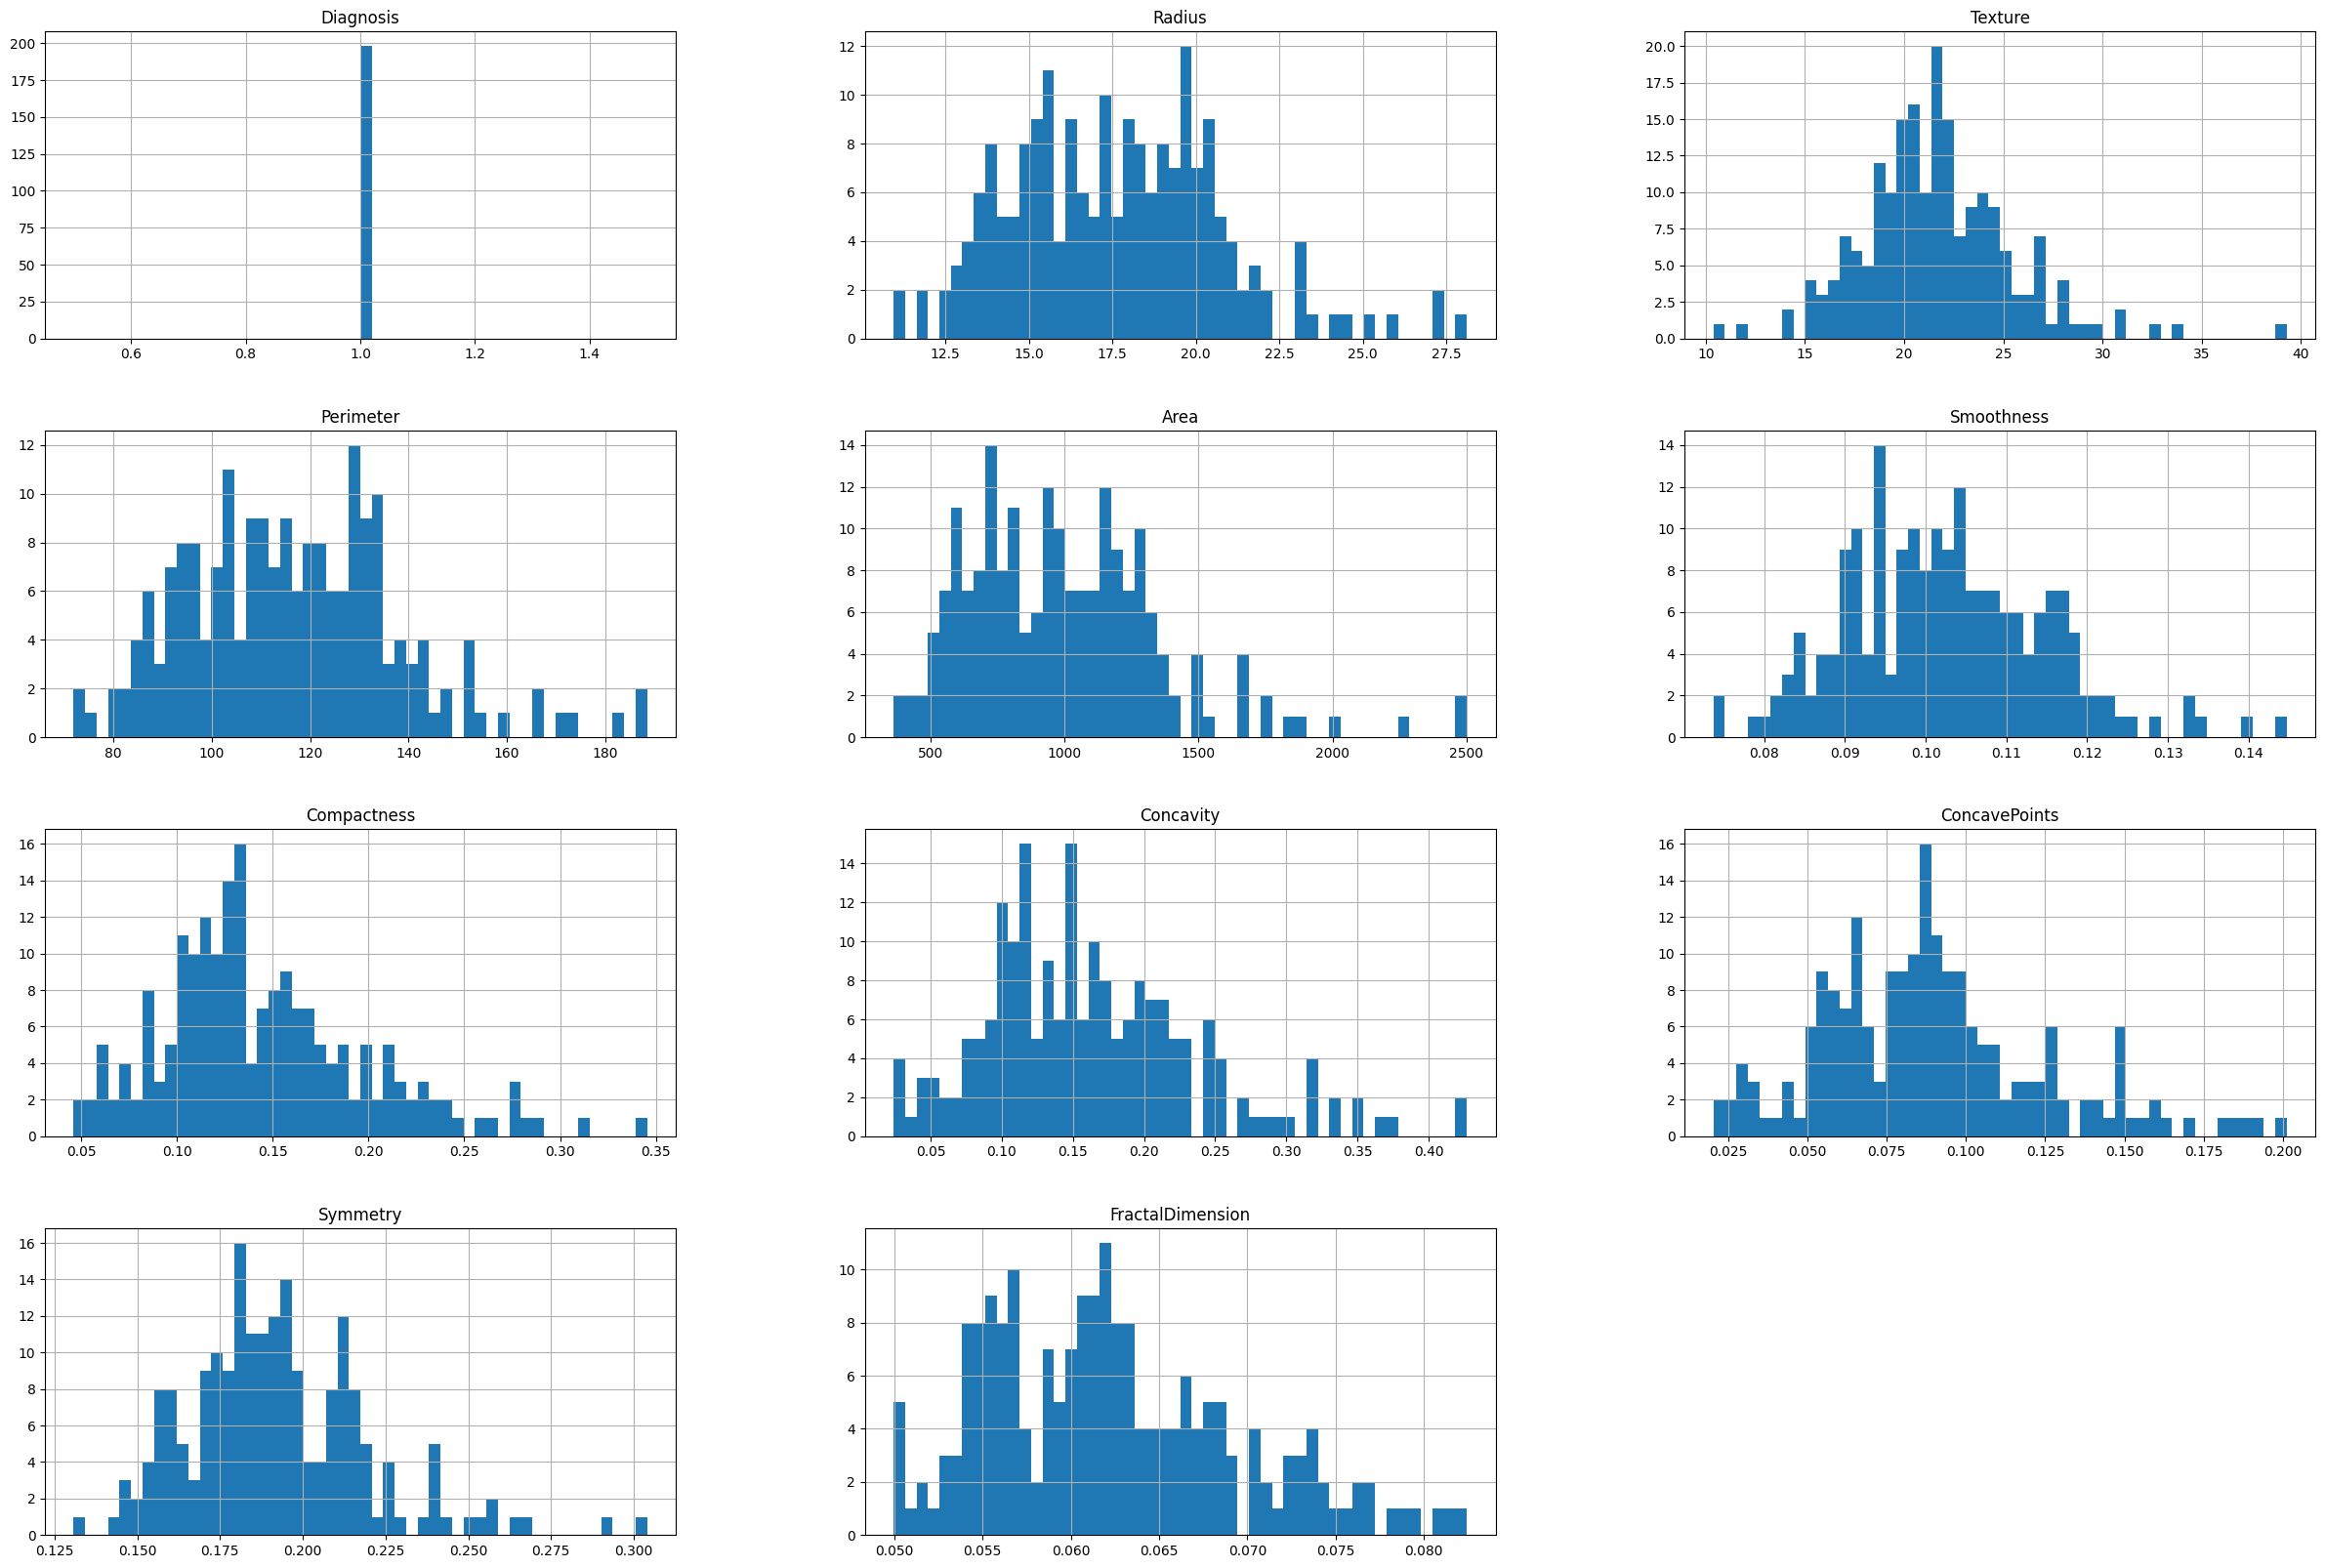

In [10]:
import matplotlib.pyplot as plt
df[df['Diagnosis']==1].hist(bins=50,figsize=(30,20))
plt.show()

### Frekuensi Setiap Atribut Diagnosis

<Axes: xlabel='Diagnosis'>

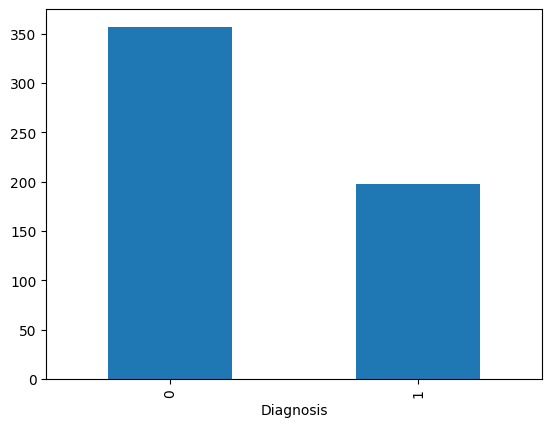

In [11]:
df['Diagnosis'].value_counts().plot.bar()

### Ekstraksi Variabel Y

In [12]:
target = df.pop('Diagnosis')

## **Split Data menjadi data training dan data test dengan formasi 80:20**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df, target, test_size = 0.2, random_state = 2021)

## **Model Training**

### Training model

In [14]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

acc_model = []
param = [0.01, 0.05, 0.25, 0.5, 0.75, 1]
for c in param:
    svm = LinearSVC(C=c)
    svm.fit(X_train,y_train)
    print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_valid, svm.predict(X_valid))))
    acc_model.append(accuracy_score(y_valid, svm.predict(X_valid)))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Akurasi untuk c = 0.01: 0.8558558558558559
Akurasi untuk c = 0.05: 0.8828828828828829
Akurasi untuk c = 0.25: 0.8108108108108109
Akurasi untuk c = 0.5: 0.9099099099099099
Akurasi untuk c = 0.75: 0.6936936936936937
Akurasi untuk c = 1: 0.8558558558558559


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Training Ulang Model

In [15]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC(C=0.05)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.05)

## **Evaluasi Model**

### Menampilkan Confussion Matrix

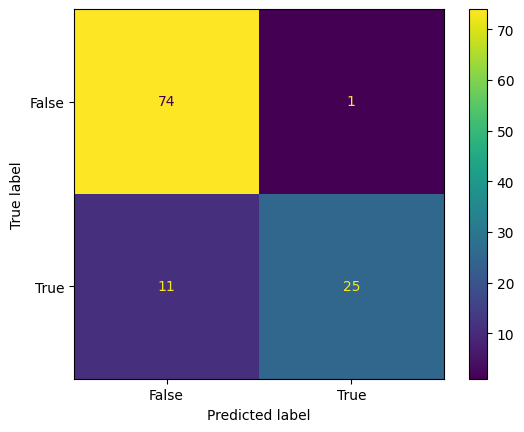

In [16]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred = svm.predict(X_valid)
confusion_matrix = confusion_matrix(y_valid, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Menampilkan Hasil Perhitungan Evaluasi

Hasil Perhitungan Evaluasi Ini menggunakan akurasi, presisi, recall dan f1-score dengan menggunakan data confussion matrix

In [17]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.96      0.69      0.81        36

    accuracy                           0.89       111
   macro avg       0.92      0.84      0.87       111
weighted avg       0.90      0.89      0.89       111



### Menampilkan Akurasi Model

In [18]:
print('Accuracy score model final: %s ' %accuracy_score(y_valid, svm.predict(X_valid)))

Accuracy score model final: 0.8918918918918919 


## **Ekspor File**

In [19]:
pickle.dump(svm, open("model.pkl", "wb"))

In [20]:
import pickle

with open("model.pkl", "rb") as f:
  obj = pickle.load(f)

In [21]:
print(obj)

LinearSVC(C=0.05)
